In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

import pickle

import scipy.stats as st
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.stattools import jarque_bera

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
#from scikeras.wrappers import KerasClassifier

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder


from keras import backend as K
from keras. layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.utils import to_categorical

In [ ]:
df = pd.read_csv('DATASET.csv')
df.shape

(9252, 23)

In [ ]:
columns = list(df.columns)
columns

['Unnamed: 0',
 'SEQN',
 'DPQ010',
 'DPQ020',
 'DPQ030',
 'DPQ040',
 'DPQ050',
 'DPQ060',
 'DPQ070',
 'DPQ080',
 'DPQ090',
 'DPQ100',
 'RIAGENDR',
 'RIDAGEYR',
 'DMDHHSIZ',
 'DMDHHSZA',
 'INDFMIN2',
 'DMDMARTL',
 'DMDEDUC2',
 'DLQ050',
 'MCQ220',
 'SMQ020',
 'SMQ040']

In [ ]:
print(df.dtypes)

Unnamed: 0    float64
SEQN          float64
DPQ010        float64
DPQ020        float64
DPQ030        float64
DPQ040        float64
DPQ050        float64
DPQ060        float64
DPQ070        float64
DPQ080        float64
DPQ090        float64
DPQ100        float64
RIAGENDR        int64
RIDAGEYR        int64
DMDHHSIZ        int64
DMDHHSZA        int64
INDFMIN2      float64
DMDMARTL      float64
DMDEDUC2      float64
DLQ050        float64
MCQ220        float64
SMQ020        float64
SMQ040        float64
dtype: object


In [ ]:
df = df.dropna(subset=['DPQ010',
 'DPQ020',
 'DPQ030',
 'DPQ040',
 'DPQ050',
 'DPQ060',
 'DPQ070',
 'DPQ080',
 'DPQ090',
 'DPQ100',])
df

,Unnamed: 0,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,...,RIDAGEYR,DMDHHSIZ,DMDHHSZA,INDFMIN2,DMDMARTL,DMDEDUC2,DLQ050,MCQ220,SMQ020,SMQ040
4,4.0,93711.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,75,1,0,2.0,2.0,4.0,1.0,2.0,1.0,1.0
5,5.0,93712.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,3,1,15.0,NaN,NaN,2.0,2.0,2.0,NaN
6,6.0,93713.0,1.0,1.0,2.0,0.0,1.0,1.0,2.0,0.0,...,56,3,0,15.0,1.0,5.0,2.0,NaN,1.0,2.0
7,7.0,93714.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,18,4,0,4.0,NaN,NaN,2.0,2.0,1.0,1.0
8,8.0,93715.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,...,67,1,0,6.0,3.0,3.0,2.0,2.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5522,5522.0,102935.0,2.0,1.0,3.0,3.0,0.0,1.0,3.0,1.0,...,52,1,0,3.0,3.0,1.0,2.0,2.0,2.0,NaN
5523,5523.0,102943.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,10,3,0,9.0,NaN,NaN,2.0,2.0,NaN,NaN
5526,5526.0,102947.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,37,5,0,15.0,1.0,3.0,2.0,2.0,NaN,NaN
5530,5530.0,102953.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2,4,2,2.0,NaN,NaN,2.0,NaN,NaN,NaN


In [ ]:
#taking the main 10 question related to mental health
cols = ['DPQ010','DPQ020','DPQ030','DPQ040','DPQ050','DPQ060','DPQ070','DPQ080','DPQ090']
mi=round(((df.loc[:,cols].sum(axis=1))/27)*100)
df['MH_Index']=mi
df1 = df[['SEQN',
 'DPQ010',
 'DPQ020',
 'DPQ030',
 'DPQ040',
 'DPQ050',
 'DPQ060',
 'DPQ070',
 'DPQ080',
 'DPQ090',
 'DPQ100',
 'RIDAGEYR',
 "RIAGENDR",
 'MH_Index']]
df1.head()

<ipython-input-58-43cc868a7571>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MH_Index']=mi


,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,DPQ100,RIDAGEYR,RIAGENDR,MH_Index
4,93711.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75,2,7.0
5,93712.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2,4.0
6,93713.0,1.0,1.0,2.0,0.0,1.0,1.0,2.0,0.0,0.0,1.0,56,1,30.0
7,93714.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,18,1,7.0
8,93715.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,67,1,15.0


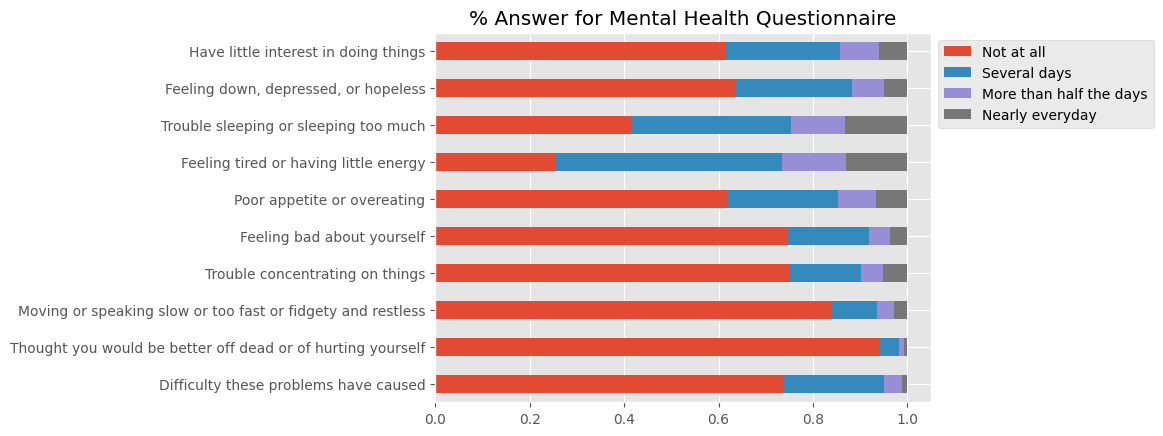

In [ ]:
plt.style.use('ggplot')
#tmp = data[1:]
# set up to plot percentiles
tmp = df1.drop('SEQN',axis = 1)
tmp = tmp.drop('RIDAGEYR',axis = 1)
tmp = tmp.drop('RIAGENDR',axis = 1)
tmp = tmp.drop('MH_Index',axis = 1)
corr_df_10 = tmp
tmp = tmp.fillna(0)
tmp = tmp.apply(pd.value_counts)
tmp = tmp.div(len(df1), axis = 1)
tmp.T.plot(kind = 'barh', stacked = True)
plt.legend(['Not at all', 'Several days', 'More than half the days', 'Nearly everyday'], 
          bbox_to_anchor=(1, 1))
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 
           ['Have little interest in doing things', 
            'Feeling down, depressed, or hopeless', 
            'Trouble sleeping or sleeping too much' , 
            'Feeling tired or having little energy', 
            'Poor appetite or overeating', 
            'Feeling bad about yourself', 
            'Trouble concentrating on things', 
            'Moving or speaking slow or too fast or fidgety and restless',
            'Thought you would be better off dead or of hurting yourself', 
            'Difficulty these problems have caused'])
plt.title('% Answer for Mental Health Questionnaire')
plt.gca().invert_yaxis()
plt.show()

<Axes: >

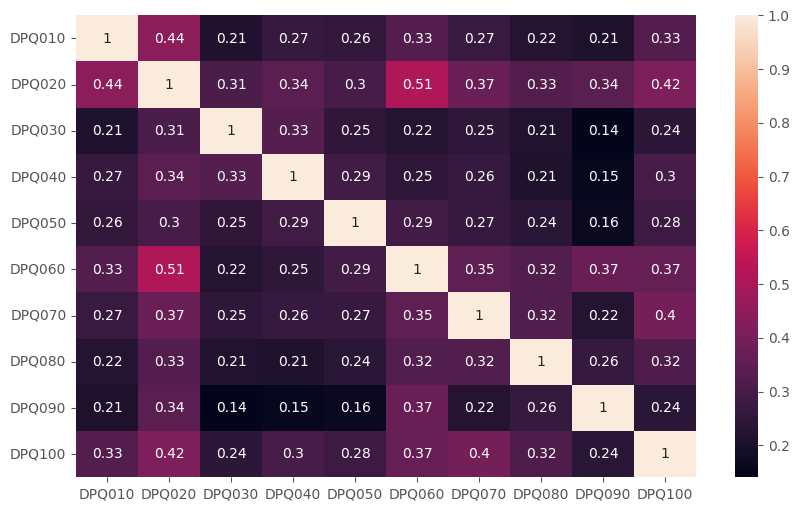

In [ ]:
#corelation between each variables
plt.figure(figsize=(10,6))
sns.heatmap(corr_df_10.corr(), annot=True)

<Axes: >

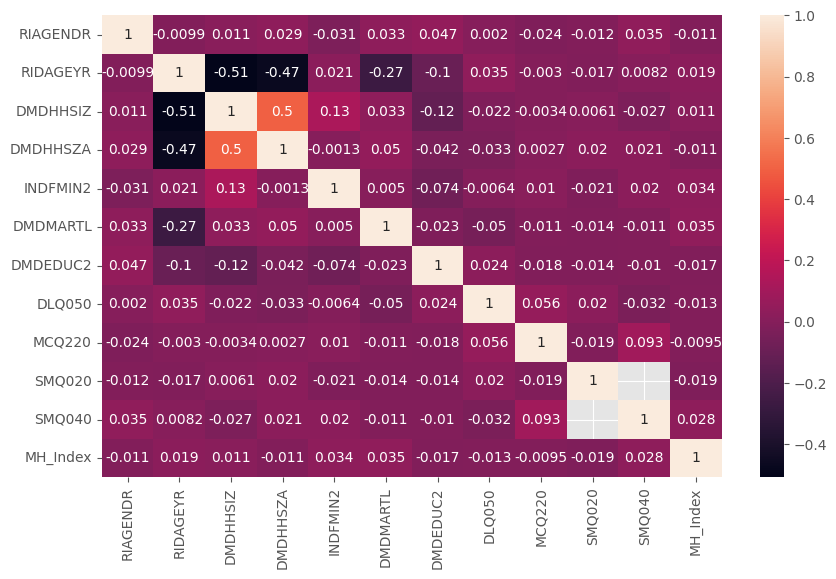

In [ ]:
#Creating a measuring index for the first  variables
cor_Df= df.iloc[:,12:df.shape[1]]
plt.figure(figsize=(10,6))
sns.heatmap(cor_Df.corr(), annot=True)

Text(0.5, 0, 'Age')

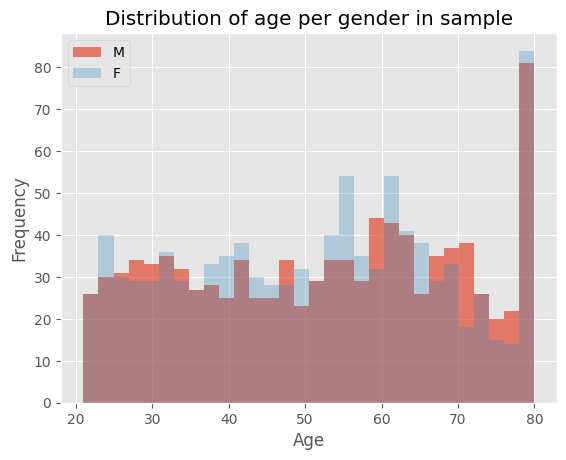

In [ ]:
#Age distribution
Age = df[['SEQN', 'RIAGENDR','RIDAGEYR','DPQ100']]
Age.head()
Age = Age[Age.RIDAGEYR>20]
Age.RIDAGEYR[Age.RIAGENDR == 1].plot(kind = 'hist', bins = 30, alpha = 0.7, label = "M")
Age.RIDAGEYR[Age.RIAGENDR == 2].plot(kind = 'hist', bins = 30, alpha = 0.3, label = "F")
plt.legend()
plt.title("Distribution of age per gender in sample")
plt.xlabel('Age')

Text(0.5, 0, 'Age')

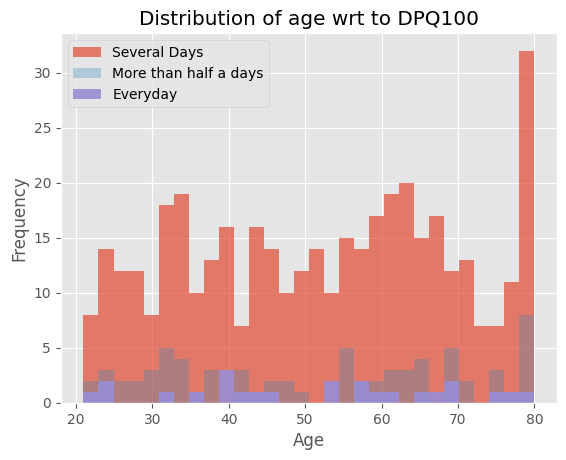

In [ ]:
Age.dropna()
Age = Age[Age.RIDAGEYR>20]
Age.RIDAGEYR[Age.DPQ100 == 1].plot(kind = 'hist', bins = 30, alpha = 0.7, label = "Several Days")
Age.RIDAGEYR[Age.DPQ100 == 2].plot(kind = 'hist', bins = 30, alpha = 0.3, label = "More than half a days")
Age.RIDAGEYR[Age.DPQ100 == 3].plot(kind = 'hist', bins = 30, alpha = 0.9, label = "Everyday")
plt.legend()
plt.title("Distribution of age wrt to DPQ100")
plt.xlabel('Age')

In [ ]:
#cleaning of data
df1 = df1[df1.DPQ010 <= 3]
df1 = df1[df1.DPQ020 <=3]
df1 = df1[df1.DPQ030 <= 3]
df1 = df1[df1.DPQ040 <= 3]
df1 = df1[df1.DPQ050 <=3]
df1 = df1[df1.DPQ060 <= 3]
df1 = df1[df1.DPQ070 <= 3]
df1 = df1[df1.DPQ080 <= 3]
df1 = df1[df1.DPQ090 <= 3]
df1 = df1[df1.DPQ100 <= 3]
df1

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,DPQ100,RIDAGEYR,RIAGENDR,MH_Index
4,93711.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75,2,7.0
5,93712.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2,4.0
6,93713.0,1.0,1.0,2.0,0.0,1.0,1.0,2.0,0.0,0.0,1.0,56,1,30.0
7,93714.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,18,1,7.0
8,93715.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,67,1,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5522,102935.0,2.0,1.0,3.0,3.0,0.0,1.0,3.0,1.0,0.0,1.0,52,1,52.0
5523,102943.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,10,2,4.0
5526,102947.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,37,2,4.0
5530,102953.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2,2,11.0


array([[<Axes: title={'center': 'MH_Index'}>]], dtype=object)

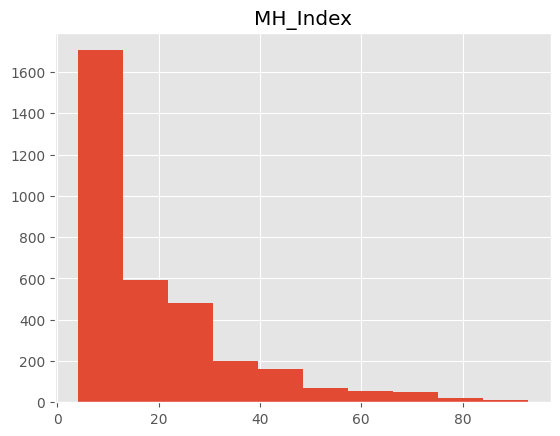

In [ ]:
df1.hist(column='MH_Index')

<Axes: xlabel='total_household', ylabel='MH_Index'>

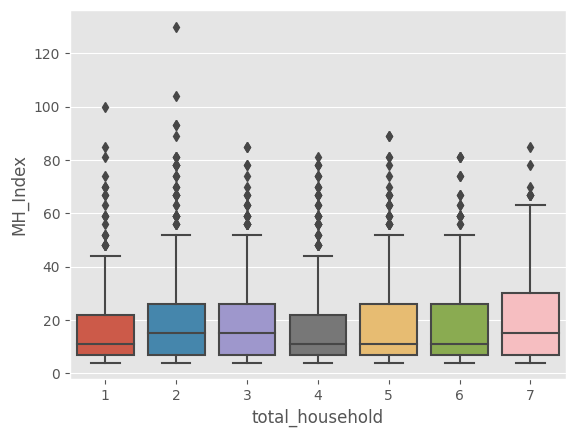

In [ ]:
df['total_household'] = df['DMDHHSIZ']
df.total_household = df.total_household.apply(lambda x: int(x))
sns.boxplot(x="total_household", y="MH_Index", data=df)

Household does not correlate much with MH_Index. Let's try with Income attribute.

The scatter plot is very much scattered and doesn't seem to exibit any relationship with the mental health factors. This can also be due to other factors where the dataset includes various age group from young to older age categories



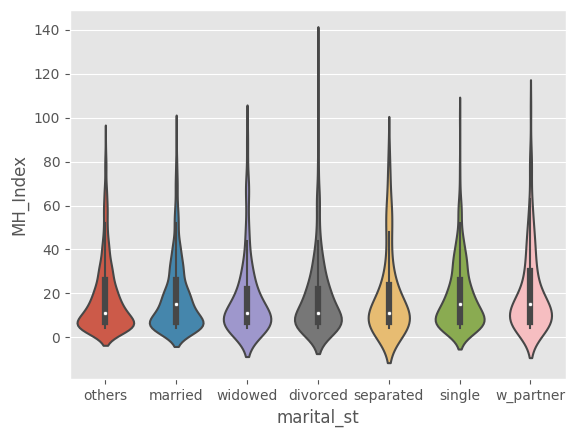

In [ ]:
df['marital_st'] = np.where((df.DMDMARTL == 77) | (df.DMDMARTL == 77) | (df.DMDMARTL.isnull()), 
         0, df.DMDMARTL)
sns.violinplot(x="marital_st", y="MH_Index", data=df)
plt.xticks([0, 1, 2, 3, 4, 5, 6], 
           labels = ['others', 'married', 'widowed', 'divorced', 
                    'separated', 'single', 'w_partner'])
plt.show()

There are more divorced people compared to widowed, maried or other people.

<Axes: xlabel='marital_st', ylabel='RIDAGEYR'>

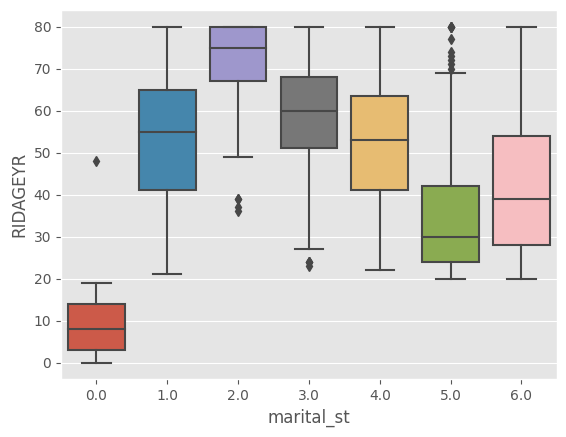

In [ ]:
sns.boxplot(x = 'marital_st', y = 'RIDAGEYR', data = df)

Most of the maried people were above the age of 50.And very few were below the age of 30. thus, adding it as an feature in predicting the mental health won't give much of an impact but can be used to predict or provide inferences in future

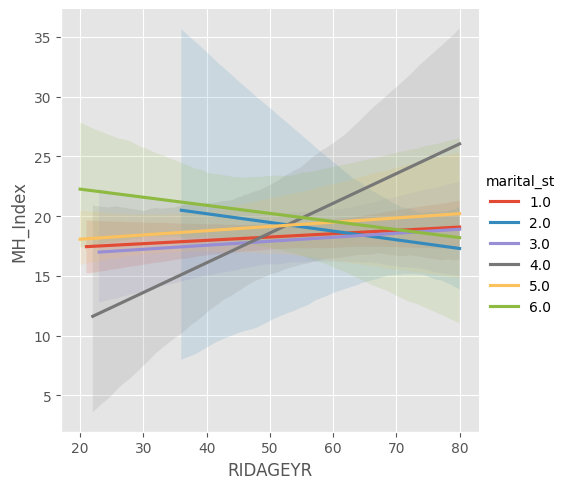

In [ ]:
sns.lmplot(x = 'RIDAGEYR', y = 'MH_Index', hue = 'marital_st', data = df[df.marital_st != 0], scatter = False)

MH_Index of seperated people has increased over the years 


---



In [ ]:
df1["DPQ100"] = np.where(df1["DPQ100"] == 0, 0, 1)
df1.head()

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,DPQ100,RIDAGEYR,RIAGENDR,MH_Index
4,93711.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,75,2,7.0
5,93712.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2,4.0
6,93713.0,1.0,1.0,2.0,0.0,1.0,1.0,2.0,0.0,0.0,1,56,1,30.0
7,93714.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,18,1,7.0
8,93715.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0,67,1,15.0


In [ ]:
#Train - Test Split
X=df1.iloc[:,1:10]
Y=df1.iloc[:,10:11]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2,random_state=0)

In [ ]:
print(Y_train.shape)
print(X_train.shape)
print(Y_test.shape)
print(X_test.shape)

(2675, 1)
(2675, 9)
(669, 1)
(669, 9)


In [ ]:
#predicting 
ann = tf.keras.models.Sequential()
#50,10,4,1
ann.add(tf.keras.layers.Dense(units=50,activation="relu"))
ann.add(tf.keras.layers.Dense(units=10,activation="relu"))
ann.add(tf.keras.layers.Dense(units=4,activation="relu"))
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])


In [ ]:
#initial 64
model = ann.fit(X_train,Y_train,batch_size=64,validation_split=0.2,epochs = 100)

Epoch 1/100
34/34 [==============================] - 2s 14ms/step - loss: 0.6812 - accuracy: 0.6430 - val_loss: 0.6632 - val_accuracy: 0.7234
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 0.6347 - accuracy: 0.7402 - val_loss: 0.6122 - val_accuracy: 0.7234
Epoch 3/100
34/34 [==============================] - 0s 6ms/step - loss: 0.5796 - accuracy: 0.7402 - val_loss: 0.5573 - val_accuracy: 0.7234
Epoch 4/100
34/34 [==============================] - 0s 6ms/step - loss: 0.5290 - accuracy: 0.7402 - val_loss: 0.5134 - val_accuracy: 0.7234
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 0.4926 - accuracy: 0.7402 - val_loss: 0.4780 - val_accuracy: 0.7327
Epoch 6/100
34/34 [==============================] - 0s 5ms/step - loss: 0.4654 - accuracy: 0.7757 - val_loss: 0.4503 - val_accuracy: 0.8019
Epoch 7/100
34/34 [==============================] - 0s 5ms/step - loss: 0.4433 - accuracy: 0.8243 - val_loss: 0.4190 - val_accuracy: 0.8224
Epoch 8/100


In [ ]:
ann.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 50)                500       
                                                                 
 dense_5 (Dense)             (None, 10)                510       
                                                                 
 dense_6 (Dense)             (None, 4)                 44        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 1,059
Trainable params: 1,059
Non-trainable params: 0
_________________________________________________________________


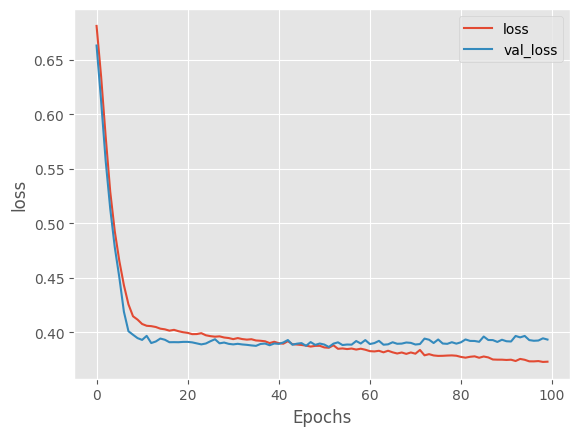

In [ ]:
  plt.plot(model.history['loss'])
  plt.plot(model.history['val_loss'])
  plt.xlabel("Epochs")
  plt.ylabel('loss')
  plt.legend(['loss', 'val_loss'])
  plt.show()

In [ ]:
y_pred= ann.predict(X_test)*100

21/21 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
ann.predict(X_test) 
np.round(ann.predict(X_test),0)
preds = np.round(ann.predict(X_test),0)
print(confusion_matrix(Y_test, preds)) 


21/21 [==============================] - 0s 2ms/step
[[460  38]
 [ 83  88]]


In [ ]:
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(Y_test, preds))

ACCURACY OF THE MODEL:  0.8191330343796711


In [ ]:
print(classification_report(Y_test, preds))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       498
           1       0.70      0.51      0.59       171

    accuracy                           0.82       669
   macro avg       0.77      0.72      0.74       669
weighted avg       0.81      0.82      0.81       669



In [ ]:
df_test=pd.DataFrame()
df_test=X_test
df_test['mental_state'] = y_pred
df_test.head

<bound method NDFrame.head of       DPQ010  DPQ020  DPQ030  DPQ040  DPQ050  DPQ060  DPQ070  DPQ080  DPQ090  \
4478     1.0     0.0     0.0     0.0     0.0     1.0     1.0     1.0     0.0   
4553     1.0     0.0     1.0     1.0     0.0     0.0     1.0     1.0     0.0   
4036     3.0     3.0     2.0     3.0     3.0     3.0     0.0     3.0     3.0   
150      0.0     0.0     0.0     3.0     0.0     1.0     0.0     0.0     0.0   
950      1.0     1.0     0.0     1.0     1.0     0.0     0.0     1.0     0.0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
751      0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0   
4021     0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0     0.0   
4188     0.0     3.0     0.0     1.0     0.0     1.0     0.0     0.0     1.0   
3916     0.0     0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0   
892      0.0     0.0     0.0     3.0     0.0     0.0     0.0     0.0     0.0   

      men

In [ ]:
cols_to_use = df_test.columns.difference(df.columns)
res2 = pd.concat([df, df_test[cols_to_use]], axis=1, join='inner')
res2

,Unnamed: 0,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,...,DMDMARTL,DMDEDUC2,DLQ050,MCQ220,SMQ020,SMQ040,MH_Index,total_household,marital_st,mental_state
5,5.0,93712.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,2.0,2.0,2.0,NaN,4.0,3,0.0,2.318564
8,8.0,93715.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,...,3.0,3.0,2.0,2.0,1.0,3.0,15.0,1,3.0,3.134931
23,23.0,93738.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,5.0,1.0,2.0,1.0,3.0,4.0,2,1.0,13.031462
24,24.0,93740.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,5.0,2.0,2.0,2.0,2.0,NaN,15.0,2,5.0,12.484912
29,29.0,93754.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,NaN,NaN,2.0,2.0,2.0,NaN,11.0,3,0.0,13.317171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5517,5517.0,102923.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,...,2.0,1.0,2.0,2.0,2.0,NaN,19.0,6,2.0,39.046383
5518,5518.0,102924.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,2.0,...,NaN,NaN,2.0,NaN,1.0,1.0,22.0,6,0.0,66.078400
5522,5522.0,102935.0,2.0,1.0,3.0,3.0,0.0,1.0,3.0,1.0,...,3.0,1.0,2.0,2.0,2.0,NaN,52.0,1,3.0,82.157974
5523,5523.0,102943.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,2.0,2.0,NaN,NaN,4.0,3,0.0,3.169929


In [ ]:
res2.to_csv('output_1.csv')

CLINICAL DATASET

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d qiriro/swell-heart-rate-variability-hrv
! unzip swell-heart-rate-variability-hrv

mkdir: cannot create directory ‘/root/.kaggle’: File exists
swell-heart-rate-variability-hrv.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  swell-heart-rate-variability-hrv.zip
replace hrv dataset/data/final/test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
#READING FROM DATASET
train = pd.read_csv('/content/hrv dataset/data/final/test.csv').drop(columns="datasetId")
test = pd.read_csv('/content/hrv dataset/data/final/train.csv').drop(columns="datasetId")
train.shape

(41033, 35)

In [ ]:
train.head

<bound method NDFrame.head of            MEAN_RR    MEDIAN_RR        SDRR      RMSSD       SDSD  SDRR_RMSSD  \
0       721.901897   727.267280   74.722315  12.361264  12.361069    6.044877   
1       843.538633   844.407930   58.499429  19.298880  19.298795    3.031234   
2       958.523868   966.671125  132.849110  21.342715  21.342653    6.224565   
3       824.838669   842.485905  117.822094  11.771814  11.771248   10.008830   
4       756.707933   747.941620  143.968457  13.357748  13.356388   10.777899   
...            ...          ...         ...        ...        ...         ...   
41028  1118.406543  1117.857050  113.955632  18.592177  18.592071    6.129225   
41029   855.991173   765.221410  296.763366  20.623727  20.610745   14.389415   
41030   689.388662   663.192770  133.815714  21.699038  21.696138    6.166896   
41031   761.421571   761.064590   60.792671  11.280586  11.280573    5.389141   
41032   868.040461   873.048735   61.301652  11.781442  11.781440    5.203239  

In [ ]:
#train
train_samples = train.drop(columns='condition').to_numpy()
train_labels = train['condition'].to_numpy()

#test
test_samples = test.drop(columns='condition').to_numpy()
test_labels = test['condition'].to_numpy()

In [ ]:
#normalizing features
scaler = MinMaxScaler(feature_range=(0,1))
train_samples = scaler.fit_transform(train_samples)
test_samples = scaler.fit_transform(test_samples)

#one-hot-encoding labels
one_hot_encoder = OneHotEncoder(categories='auto')
train_labels = one_hot_encoder.fit_transform(train_labels.reshape(-1, 1)).toarray()
test_labels = one_hot_encoder.fit_transform(test_labels.reshape(-1, 1)).toarray()

In [ ]:

#build the model
model = Sequential([
    Dense(34, input_shape=[34,], activation='relu'),
#     Dense(20, activation='relu'),
    Dense(10, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(Adam(lr=.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
     
model = model.fit(train_samples, train_labels, validation_split=0.1, batch_size=10, epochs=100, shuffle=True, verbose=2)

Epoch 1/100


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


3693/3693 - 7s - loss: 0.9598 - accuracy: 0.5628 - val_loss: 0.8929 - val_accuracy: 0.6211 - 7s/epoch - 2ms/step
Epoch 2/100
3693/3693 - 7s - loss: 0.8906 - accuracy: 0.6157 - val_loss: 0.8690 - val_accuracy: 0.6277 - 7s/epoch - 2ms/step
Epoch 3/100
3693/3693 - 6s - loss: 0.8678 - accuracy: 0.6227 - val_loss: 0.8491 - val_accuracy: 0.6384 - 6s/epoch - 2ms/step
Epoch 4/100
3693/3693 - 7s - loss: 0.8456 - accuracy: 0.6349 - val_loss: 0.8284 - val_accuracy: 0.6489 - 7s/epoch - 2ms/step
Epoch 5/100
3693/3693 - 6s - loss: 0.8236 - accuracy: 0.6413 - val_loss: 0.8095 - val_accuracy: 0.6486 - 6s/epoch - 2ms/step
Epoch 6/100
3693/3693 - 8s - loss: 0.8038 - accuracy: 0.6446 - val_loss: 0.7911 - val_accuracy: 0.6555 - 8s/epoch - 2ms/step
Epoch 7/100
3693/3693 - 6s - loss: 0.7857 - accuracy: 0.6529 - val_loss: 0.7738 - val_accuracy: 0.6525 - 6s/epoch - 2ms/step
Epoch 8/100
3693/3693 - 7s - loss: 0.7691 - accuracy: 0.6618 - val_loss: 0.7596 - val_accuracy: 0.6750 - 7s/epoch - 2ms/step
Epoch 9/100


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
preds = np.round(model.predict(test_samples),0)

11541/11541 [==============================] - 31s 3ms/step


In [ ]:
test_labels

array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [ ]:
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(test_labels, preds))

ACCURACY OF THE MODEL:  0.8465862779557474


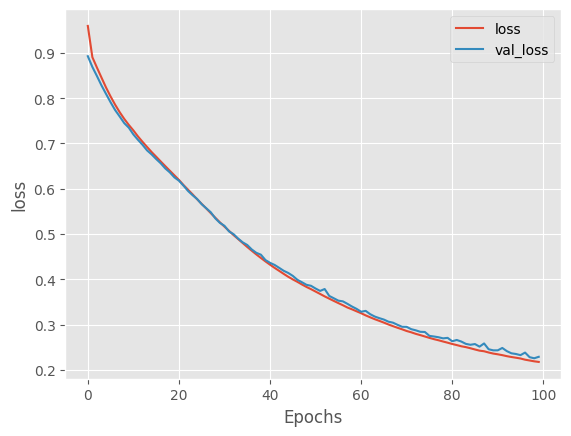

In [ ]:
  plt.plot(model.history['loss'])
  plt.plot(model.history['val_loss'])
  plt.xlabel("Epochs")
  plt.ylabel('loss')
  plt.legend(['loss', 'val_loss'])
  plt.show()

In [ ]:
print(classification_report(preds, test_labels))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88     98488
           1       0.94      0.88      0.91    213823
           2       0.56      0.88      0.68     40644

   micro avg       0.85      0.89      0.87    352955
   macro avg       0.78      0.89      0.82    352955
weighted avg       0.87      0.89      0.87    352955
 samples avg       0.85      0.85      0.85    352955



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
